In [ ]:
# Por si alguien corre en python2
from __future__ import division

# Preparamos todo para correr
import numpy as np
from math import sqrt
from matplotlib import pylab as plt

# Importamos un módulo nuestro

#!mkdir library
#!wget https://raw.githubusercontent.com/exord/UNSAM_IA/master/library/utils.py .
from library import utils

# *Aleatoreidad y probabilidad*
La aleatoredidad es un concepto central de la teoría de probabilidad. En general, la aleatoredidad viene asociada con la incetidumbre, que puede surgir por los errores de los datos o por los tamaños finitos de las muestras.

En la computadora, la aleatoreidad se simula usando como base un [generador de números pseudo aleatorios](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) (GNPA). Un GNPA genera una serie de números cuyas propiedades son similares a las de una serie de números aleatorios.

En <tt>python</tt> muchas de las funciones relacionadas están implementadas en el módulo <tt>random</tt>, pero una implementación más práctica aparece en el paquete <tt>numpy</tt>

In [ ]:
# Importamos el paquete random de numpy
from numpy import random

In [16]:
# Generamos un número al azar en el intervalo [0.0, 1.0)
x = random.rand()
print(x)

0.37707718383128064


Fíjense que si corren la celda de arriba muchas veces, el resultado obtenido es diferente, pero siempre un número entre 0 y 1. Pero en realidad, los GNPA utilizan algoritmos, cuyas propiedades estás perfectamente definidas por el valor inicial (la semilla, o <em>seed</em>). Por lo tanto, no son realmente aleatorios. En los viejos tiempos, en <tt>python</tt>, el <em>seed</em> podía definirse simplemente con la función homónima.

In [18]:
random.seed(1234)
print(random.rand())
random.seed(1234)
print(random.rand())

0.1915194503788923
0.1915194503788923


Una característica práctica de la implementación en <tt>numpy</tt> es que se puede generar <tt>arrays</tt> de números aleatorios, pasándole el tamaño en cada dimensión. El jueves vamos a ver más detalle de las características de los <tt>arrays</tt> de <tt>numpy</tt>.

In [19]:
random.seed(1234)
print('Un array de 5x1')
print(random.rand(5,))
print('Un array de 3x2')
print(random.rand(3,2))

Un array de 5x1
[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]
Un array de 3x2
[[0.27259261 0.27646426]
 [0.80187218 0.95813935]
 [0.87593263 0.35781727]]


Y por supuesto, si vuelvo a la misma semilla, los resultado son idénticos.

In [20]:
random.seed(1234)
print('Un array de 5x1')
print(random.rand(5,))
print('Un array de 3x2')
print(random.rand(3,2))

Un array de 5x1
[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]
Un array de 3x2
[[0.27259261 0.27646426]
 [0.80187218 0.95813935]
 [0.87593263 0.35781727]]


Como se puede ver arriba, para una semilla dada, la serie de números generada es idéntica. En la actualidad, fijar el <em>seed</em> de la manera que aparece arriba se considera mala práctica, y la sugerencia es hace lo siguiente:

In [22]:
from numpy.random import RandomState, SeedSequence
rs = RandomState(random.MT19937(SeedSequence(1234)))
print(rs.rand(5,))
# Later, you want to restart the stream
rs = RandomState(random.MT19937(SeedSequence(1234)))
print(rs.rand(5,))

[0.12038356 0.40370142 0.87770263 0.9565788  0.42646002]
[0.12038356 0.40370142 0.87770263 0.9565788  0.42646002]


Ahora vamos a intentar visualizar una muestra de una distribución uniforme. Generamos una muestra de 100 elementos de vectores en dos dimenciones, en la región -1 < x < 1; -1 < y < 1

In [30]:
# Genaramos la muestra
sample = random.rand(100, 2)  #genero una matriz de 100x2 de numeros aleatorios entre 0 y 1

# Como queremos que la muestra esté entre -1 y 1 en ambas dimensiones, tenemos que multiplicar por 2 y restar 1.
sample = sample * 2 - 1 

# Imprimimos la forma de la muestra, el minimo y el maximo
print("shape:",sample.shape)
print("minimum:",sample.min())
print("maximun:",sample.max())



shape: (100, 2)
minimum: -0.9909070671975335
maximun: 0.9919056819763161


Text(0, 0.5, '$\\theta_1$')

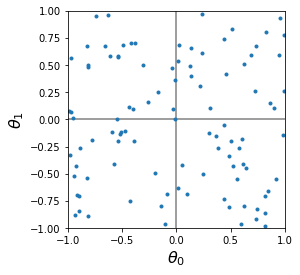

In [31]:
#representamos en un plano.
l0, = plt.plot(sample[:, 0], sample[:, 1], '.') 
    #plot de:
      # X=los elementos de la columna 0 (la primera)
      # Y=los elementos de la columna 1 
      # el "."" es la forma en qu evoya imprimir

# Para que sea más bonito, ponemos los ejes del mismo tamaño y le agregamos lineas verticales y horizontales
ax = plt.gca()
ax.set_aspect('equal')
ax.axvline(0, color='0.5', zorder=-1)
ax.axhline(0, color='0.5', zorder=-1)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel(u'$\\theta_0$', fontsize=16)
ax.set_ylabel(u'$\\theta_1$', fontsize=16)
#ax.axis('off')

Vamos a contar ahora cuantos de los elementos de la muestra caen en el cuadrante superior derecho, y veamos a qué fracción del total corresponde. Pero antes, <b>¿qué valor esperamos? ¿por qué?</b>

In [35]:
# Escribimos la condición de pertenencia al cuadrante de interés
cond = (sample[:, 0] > 0) * (sample[:, 1] > 0) 
#defino una condicion que es:
    #los elementos de la primera columna mayor a 0 y multiplico (un AND/ Y logico) por los elemntos de la segunda columna mayor a 0 
    # los que cumplen esta condicion son los elementos del primer cuadrante
# Veamos la pinta que tiene cond
print(cond)

[False False  True False False False False  True  True  True False  True
 False  True False False False False False False False False  True False
 False False  True False False False False  True False  True False False
 False False False False False False False  True False  True False False
 False False False False False False False False False  True  True False
 False False False False False  True False False False False False False
 False False False  True  True False  True  True  True False False False
 False  True False False False False False False False False  True False
 False  True False False]


In [33]:
# Sumar los elementos de cond nos dice en cuantos casos la condición se satisface
n_ad = np.sum(cond)
print('Hay {} elementos en el cuadrante superior derecho.'.format(n_ad))

# Calculo la fracción a la que correponde
f_ad = n_ad / len(sample)
print('La fracción de elementos en el cuadrante superior derecho es {}.'.format(f_ad))

Hay 23 elementos en el cuadrante superior derecho.
La fracción de elementos en el cuadrante superior derecho es 0.23.


Como es de esperar, la fracción se aproxima a 1/4. Pero, <b>¿cuán cerca de 0.25 tenemos que tiene que estar el número obtenido para que nos quedemos contentos? ¿y cómo cambia esto con el tamaño de la muestra?</b>

## Incertezas

Para responder a esas preguntas, por un lado tenemos que definir algún concepto de incerteza de f_ur. Ya veremos que la variable f_ur sigue una distribución Poissoneana, cuya desviación estándar (ya lo definiremos bien, pero podemos pensarlo como un error), es $\sqrt{n_{UR}}/N$, donde $N$ es el tamaño de la muestra. Entonces





In [34]:
sd_f = sqrt(n_ad)/len(sample)

print('El error de f_ur es {}'.format(sd_f))
print('La fracción es entonces {:.3f} \pm {:.3f}'.format(f_ad, sd_f))

El error de f_ur es 0.04795831523312719
La fracción es entonces 0.230 \pm 0.048


Vemos, entonces que la fracción es perfectamente compatible con el valor esperado 1/4. 

***
### Preguntas

<ul>
    <li>Si tuviéramos solo esta medición (es decir, la fracción de elementos de la muestra que cae en el cuadrante superior derecho), pero si no conociéramos la forma en la que la muestra fue generada, ¿podríamos decir que la distribución es uniforme en la región de $\mathbb{R}ˆ2$ tal que $-1 < x < 1$ y $-1 < y < 1$? </li>
    <li> A la inversa, si el número fuera, por ejemplo $0.245 \pm 0.001$, ¿qué podríamos decir del proceso de generación de la muestra?
    </ul>    
    
***

## Tamaño de la muestra

Estudiemos ahora cómo cambia nuestra precisión con el tamaño de la muestra. Para eso, escribamos una pequeña función que genere una muestra, y que calcule la fracción de elementos que caen en el cuadrante superior derecho y su incerteza. La función tiene un solo argumento: el tamaño de la muestra.

Para escribirla, hay que ir recolectando las líneas relevantes de los celdas de arriba (Consejo: usar <tt>random.rand</tt> para generar la muestra). Borrar el comando <tt>pass</tt> y a codear!

In [ ]:
import numpy as np

def fraccion_ad(n, seed=None):
    """
    :param int n: Tamaño de la muestra
    
    :returns: fracción de la muestra en el cuadrante superior derecho e incerteza de esta fracción
    :rtype: float, float
    """
    # Fijar la semilla
    if seed is not None:
        np.random.seed(seed)

    # a partir de aca lo hago yo 
    # Crear la muestra.    

    sample = random.rand(n, 2) #creo la muestra entre 0 y 1
    sample = sample *2 -1 # la hago entre -1 y 1
    cond = (sample[:, 0] > 0) * (sample[:, 1] > 0)  #agarro el primer cuadrante
    n_ad = np.sum(cond) #sumo la cantidad de muestras en el primer cuadrante
    f_ad = n_ad / len(sample) #
    sd_f = sqrt(n_ad)/len(sample)
    
    return f_ad , sd_f



Ahora vamos a testear la función usando el paquete utils que está en el repositorio. Después los invitamos a chusmearlo.

In [42]:
utils.test_fraccion(fraccion_ad)

☺︎


Ahora calculemos la fracción para diferentes tamaños de la muestra, y guardemos todo en unas listas, para plotearlas después. <em>NB: el jueves veremos con más detalle cómo funcionan las listas, arreglos, etc.</em>

In [46]:
# Crea dos listas vacías
f = [] #para el valor de fraccion
sd = [] #y de incerteza

# Crea un arreglo con los tamaños de las muestras que vamos a usar. Generamos valores desde 2^4 hasta 2^13.
# Vamos a espacirlo en log, para tener más resolución en los tamaños pequeños.
sizes = 2**np.arange(4, 14) #2^{todos los numeros entre 4 y 14}

# Iteramos en los tamaños (usamos siempre el mismo seed?)
for size in sizes:  #recorro todos los valores de sizes
    output = fraccion_ad(size) #meto los distintos valores de tamaños creados en la funcion que hice antes
    f.append(output[0]) # aca meto las fracciones
    sd.append(output[1]) #aca meto la incertezas
    
# Veamos que obtuvimos
for i in range(len(f)): #para cada valor de f
    print('{}, {}'.format(f[i], sd[i])) #imprimo su f y su sd

0.25, 0.125
0.21875, 0.08267972847076846
0.234375, 0.06051536478449089
0.2734375, 0.04621937330546575
0.25, 0.03125
0.240234375, 0.021661204114080894
0.2421875, 0.015378921628929319
0.236328125, 0.0107421875
0.238037109375, 0.007623288572263669
0.2476806640625, 0.005498586733181254


Y ahora el momento del plot

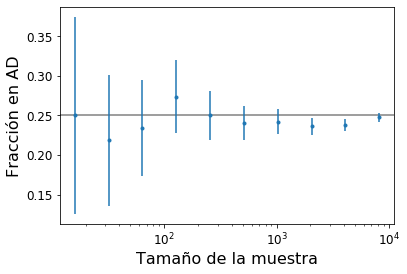

In [48]:
plt.errorbar(sizes, f, sd, fmt='.') #ploteo con barras de error

# Para que sea más legible, hacemos el eje x logarítmico
ax = plt.gca()
ax.set_xscale('log')
ax.axhline(0.25, color='0.5', zorder=-1)

ax.set_xlabel('Tamaño de la muestra', fontsize=16)
ax.set_ylabel('Fracción en AD', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)

obs1: a medida que el tamaño de las muestras es mas grande la barra de error es mas pequeña, es decir que la incerteza es cada vez menor.

***

### Preguntas

<ul>
    <li> Sí repetimos el experimento, ¿cómo va a cambiar el plot de arriba?</li>
    <li> ¿En qué fracción de los casos veremos puntos cuyas barras de error no tocan 0.25?</li>
    <li> ¿Cuál es la <em>probabilidad</em> de que un elemento de la muestra caiga en el cuadrante superior derecho?</li>
</ul>

***

## Eficiencia

Claro que al correr la función muchas veces, cometimos el error de generar muchas muestras. Una forma más práctica sería generar una sola muestra grande, e ir obteniendo sub-muestras en las cuales hacer el cálculo (ver [Ejercicios](Ejercicios_01_Aleatoreidad.ipynb)). Veamos cuánto tiempo nos tarda la generación de este plot con la versión actual. Para eso, podemos usar muchas mediciones diferentes.

In [49]:
def corrida():
    f = []
    sd = []

    # Crea un arreglo con los tamaños de las muestras que vamos a usar. Generamos valores desde 2^4 hasta 2^13.
    # Vamos a espacirlo en log, para tener más resolución en los tamaños pequeños.
    sizes = 2**np.arange(4, 14)

    # Iteramos en los tamaños (usamos siempre el mismo seed?)
    for size in sizes:
        output = fraccion_ad(size)
        f.append(output[0])
        sd.append(output[1])
        
    return

nruns = 1000
# Podemos usar el módulo timeit
import timeit
dt = timeit.timeit(corrida, number=nruns)
print('Tiempo de ejecución medida con timeit para {} corridas: {:.3f} segundos'.format(nruns, dt))

# O contar el tiempo a mano con el módulo time
import time
ti = time.process_time()
for i in range(nruns):
    corrida()
print('Tiempo de ejecución medida con time para {} corridas: {:.3f} segundos'.format(nruns, (time.process_time() - ti)))

Tiempo de ejecución medida con timeit para 1000 corridas: 0.570 segundos
Tiempo de ejecución medida con time para 1000 corridas: 0.549 segundos
